### Bank Customer Dataset Description

This notebook contains a dataset of bank customers with the following columns:

Age: Age of the customer.

Experience: Years of professional experience.

Income: Annual income of the customer (in $000).

ZIP Code: Home ZIP Code of the customer.

Family: Family size of the customer.

CCAvg: Average spending on credit cards per month (in $000).

Education: Education level (1: Undergrad, 2: Graduate, 3: Advanced/Professional).

Mortgage: Value of the mortgage if any (in $000).

Personal Loan: Indicator if the customer has a personal loan (1: Yes, 0: No).

Securities Account: Indicator if the customer has a securities account (1: Yes, 0: No).

CD Account: Indicator if the customer has a certificate of deposit account (1: Yes, 0: No).

Online: Indicator if the customer uses internet banking services (1: Yes, 0: No).

CreditCard: Indicator if the customer uses a credit card issued by the bank (1: Yes, 0: No).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df = df.drop('ID', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [7]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
df_copy = df.copy(deep = True)
df_copy[['CCAvg','Mortgage','Personal Loan','CD Account','Online','Securities Account']]=df_copy[['CCAvg','Mortgage','Personal Loan','CD Account','Online','Securities Account']].replace(0,np.NaN)

In [11]:
df_copy['Mortgage'].fillna(df_copy['Mortgage'].mean(), inplace = True)

In [12]:
df_copy['Personal Loan'].fillna(df_copy['Personal Loan'].mean(), inplace = True)

In [13]:
df_copy['Securities Account'].fillna(df_copy['Securities Account'].median(), inplace = True)

In [14]:
df_copy['CreditCard'].fillna(df_copy['CreditCard'].median(), inplace = True)

In [15]:
df_copy['CD Account'].fillna(df_copy['CD Account'].median(), inplace = True)

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               4894 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   float64
 8   Personal Loan       5000 non-null   float64
 9   Securities Account  5000 non-null   float64
 10  CD Account          5000 non-null   float64
 11  Online              2984 non-null   float64
 12  CreditCard          5000 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 507.9 KB


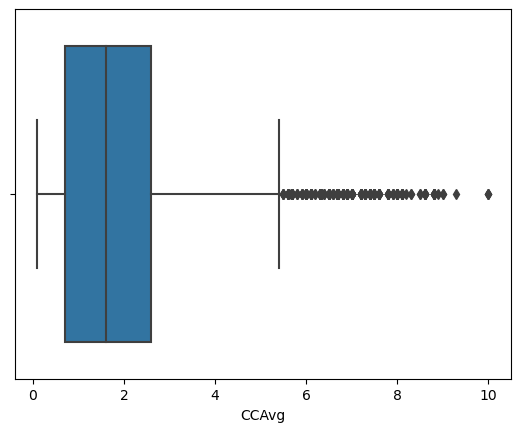

In [18]:
sns.boxplot(x='CCAvg',data=df_copy)
plt.show()

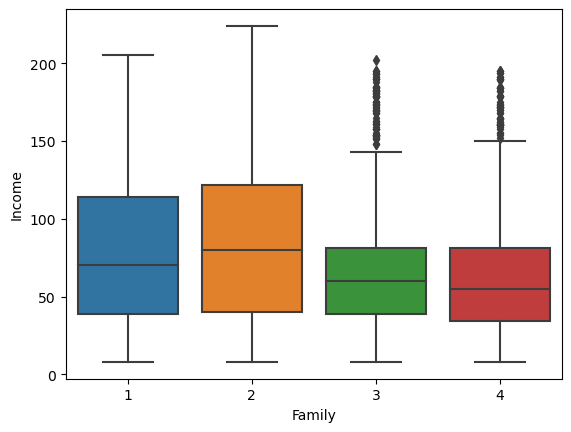

In [19]:
sns.boxplot(x='Family', y='Income',data=df_copy)
plt.show()

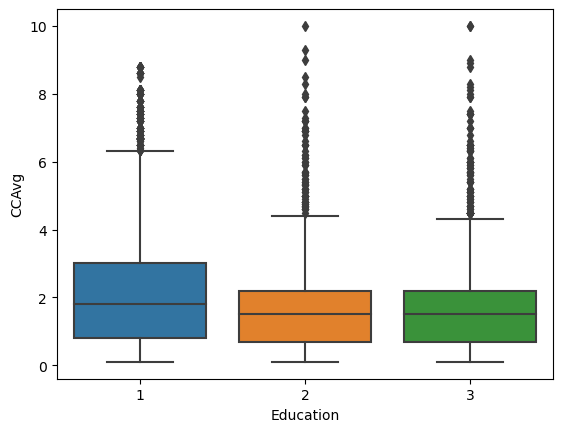

In [20]:
sns.boxplot(x='Education', y='CCAvg',data=df_copy)
plt.show()

### Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
scaler.fit(df.drop('CreditCard',axis=1))

StandardScaler()

In [18]:
scaled_features = scaler.transform(df.drop('CreditCard',axis=1))

In [19]:
scaled_features

array([[-1.77441684, -1.66607847, -0.53822878, ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-0.02952359, -0.09633022, -0.8641094 , ...,  2.92891517,
        -0.25354028, -1.21661774],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.34142334,
        -0.25354028, -1.21661774],
       ...,
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.34142334,
        -0.25354028, -1.21661774],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.34142334,
        -0.25354028,  0.82195086],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.34142334,
        -0.25354028,  0.82195086]])

In [20]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [21]:
df_feat['CreditCard']=df['CreditCard']

In [22]:
df_feat.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,0
1,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618,0
2,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,0
3,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,0
4,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618,1


### Decide Dependant and Independant Elements in Data Set

In [23]:
X = df_feat.drop('CreditCard',axis=1)
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,-0.964114,1.397414,-0.193385,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,-1.443932,0.525991,-0.250611,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,0.738814,-1.216855,-0.536736,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,0.452243,-1.216855,0.436091,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,-0.859007,1.397414,-0.536736,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-1.425438,-1.491662,-0.733757,-0.214694,-1.216855,-0.021710,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,0.821951
4996,-1.338194,-1.404454,-1.276892,-0.525774,1.397414,-0.880087,-1.049078,0.280238,-0.325875,-0.341423,-0.25354,0.821951
4997,1.540880,1.647835,-1.081363,-0.061039,-0.345432,-0.937312,1.332484,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4998,1.715370,1.735043,-0.538229,-1.469855,0.525991,-0.822862,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,0.821951


In [24]:
y = df_feat['CreditCard']

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3, random_state=42)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1840 to 860
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3500 non-null   float64
 1   Experience          3500 non-null   float64
 2   Income              3500 non-null   float64
 3   ZIP Code            3500 non-null   float64
 4   Family              3500 non-null   float64
 5   CCAvg               3500 non-null   float64
 6   Education           3500 non-null   float64
 7   Mortgage            3500 non-null   float64
 8   Personal Loan       3500 non-null   float64
 9   Securities Account  3500 non-null   float64
 10  CD Account          3500 non-null   float64
 11  Online              3500 non-null   float64
dtypes: float64(12)
memory usage: 355.5 KB


In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1501 to 1912
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   float64
 1   Experience          1500 non-null   float64
 2   Income              1500 non-null   float64
 3   ZIP Code            1500 non-null   float64
 4   Family              1500 non-null   float64
 5   CCAvg               1500 non-null   float64
 6   Education           1500 non-null   float64
 7   Mortgage            1500 non-null   float64
 8   Personal Loan       1500 non-null   float64
 9   Securities Account  1500 non-null   float64
 10  CD Account          1500 non-null   float64
 11  Online              1500 non-null   float64
dtypes: float64(12)
memory usage: 152.3 KB


## Bagging Algorithms

### Bagged Decision Tree

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [31]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

/Users/sujalsuthar/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2457    0]
 [   1 1042]]
ACCURACY SCORE:
0.9997
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999593     1.000000  0.999714     0.999797      0.999714
recall        1.000000     0.999041  0.999714     0.999521      0.999714
f1-score      0.999797     0.999520  0.999714     0.999658      0.999714
support    2457.000000  1043.000000  0.999714  3500.000000   3500.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[998  75]
 [341  86]]
ACCURACY SCORE:
0.7227
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.745332    0.534161  0.722667     0.639747      0.685219
recall        0.930103    0.201405  0.722667     0.565754      0.722667
f1-score      0.827529    0.292517  0.722667     0.560023      0.675229
support    1073.000000  427.000000  0.722667  1500.000000   1500.000000


In [32]:
scores = {
    'Decision Tree': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [33]:
scores

{'Bagging Classifier': {'Train': 0.9997142857142857,
  'Test': 0.7226666666666667}}

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2457    0]
 [   1 1042]]
ACCURACY SCORE:
0.9997
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.999593     1.000000  0.999714     0.999797      0.999714
recall        1.000000     0.999041  0.999714     0.999521      0.999714
f1-score      0.999797     0.999520  0.999714     0.999658      0.999714
support    2457.000000  1043.000000  0.999714  3500.000000   3500.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1019   54]
 [ 341   86]]
ACCURACY SCORE:
0.7367
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.749265    0.614286  0.736667     0.681775      0.710841
recall        0.949674    0.201405  0.736667     0.575539      0.736667
f1-score      0.837649    0.303351  0.736667     0.570500      0.685552
support    1073.000000  427.000000  0.736667  1500.000000   1500.000000


In [35]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [36]:
scores

{'Bagging Classifier': {'Train': 0.9997142857142857,
  'Test': 0.7226666666666667},
 'Random Forest': {'Train': 0.9997142857142857, 'Test': 0.7366666666666667}}

## Boosting Algorithms

### Adaboost

In [37]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2419   38]
 [ 873  170]]
ACCURACY SCORE:
0.7397
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.734812     0.817308  0.739714     0.776060      0.759395
recall        0.984534     0.162991  0.739714     0.573763      0.739714
f1-score      0.841538     0.271783  0.739714     0.556660      0.671751
support    2457.000000  1043.000000  0.739714  3500.000000   3500.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1049   24]
 [ 358   69]]
ACCURACY SCORE:
0.7453
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.745558    0.741935  0.745333     0.743747      0.744527
recall        0.977633    0.161593  0.745333     0.569613      0.745333
f1-score      0.845968    0.265385  0.745333     0.555676      0.680695
support    1073.000000  427.000000  0.745333  1500.000000   1500.000000


In [38]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [39]:
scores

{'Bagging Classifier': {'Train': 0.9997142857142857,
  'Test': 0.7226666666666667},
 'Random Forest': {'Train': 0.9997142857142857, 'Test': 0.7366666666666667},
 'AdaBoost': {'Train': 0.7397142857142858, 'Test': 0.7453333333333333}}

### Stochastic Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[2441   16]
 [ 848  195]]
ACCURACY SCORE:
0.7531
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.742171     0.924171  0.753143     0.833171      0.796407
recall        0.993488     0.186961  0.753143     0.590224      0.753143
f1-score      0.849635     0.311005  0.753143     0.580320      0.689123
support    2457.000000  1043.000000  0.753143  3500.000000   3500.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[1050   23]
 [ 360   67]]
ACCURACY SCORE:
0.7447
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.744681    0.744444  0.744667     0.744563      0.744614
recall        0.978565    0.156909  0.744667     0.567737      0.744667
f1-score      0.845751    0.259188  0.744667     0.552469      0.678776
support    1073.000000  427.000000  0.744667  1500.000000   1500.000000


In [41]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [42]:
scores

{'Bagging Classifier': {'Train': 0.9997142857142857,
  'Test': 0.7226666666666667},
 'Random Forest': {'Train': 0.9997142857142857, 'Test': 0.7366666666666667},
 'AdaBoost': {'Train': 0.7397142857142858, 'Test': 0.7453333333333333},
 'Gradient Boosting': {'Train': 0.7531428571428571,
  'Test': 0.7446666666666667}}

## Model Comparison

<Axes: >

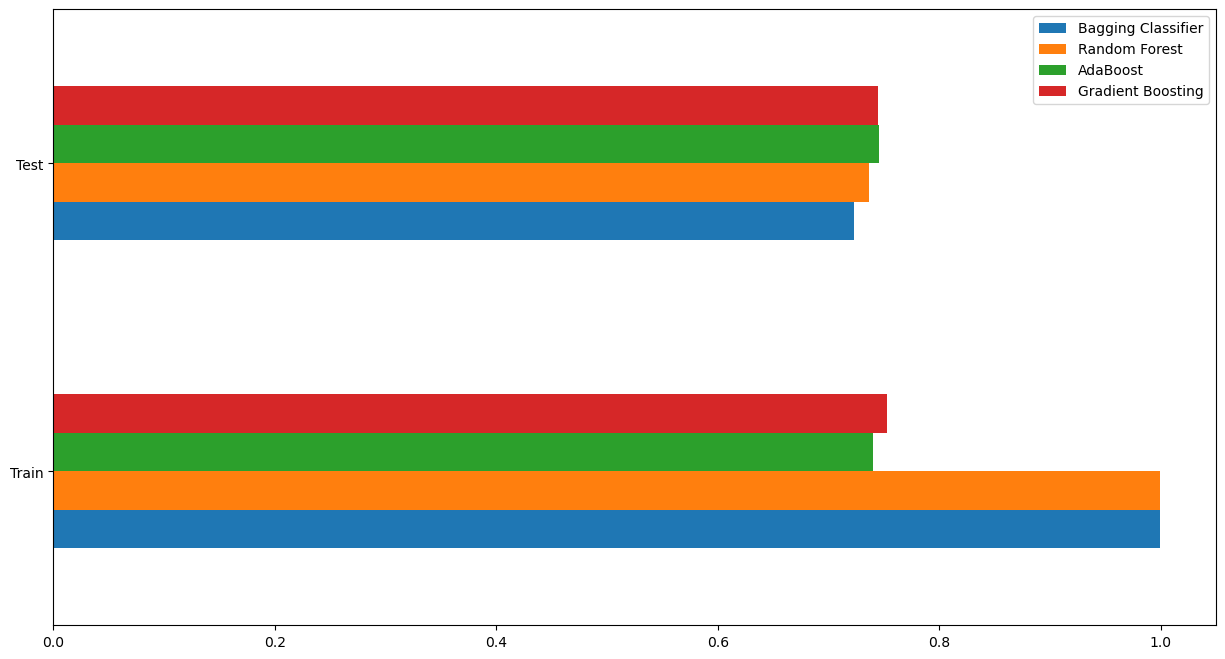

In [43]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

# Conclusion


The performance of different ensemble learning models was evaluated based on their accuracy scores on the training and test datasets. The results are summarized as follows:

##### Bagging Classifier:

Train Accuracy: 99.97%
Test Accuracy: 72.27%

##### Random Forest:

Train Accuracy: 99.97%
Test Accuracy: 73.67%

##### AdaBoost:

Train Accuracy: 73.97%
Test Accuracy: 74.53%

##### Gradient Boosting:

Train Accuracy: 75.31%
Test Accuracy: 74.47%

From the results, it is evident that the Bagging Classifier and Random Forest models exhibit high training accuracy, indicating that they fit the training data exceptionally well. However, their test accuracy scores are significantly lower, suggesting potential overfitting.

In contrast, AdaBoost and Gradient Boosting models show a more balanced performance between training and test accuracies. Notably, AdaBoost achieves the highest test accuracy of 74.53%, indicating that it generalizes better to unseen data compared to the other models.

Overall, while Bagging Classifier and Random Forest demonstrate high training accuracy, their performance on the test set highlights issues with overfitting. On the other hand, AdaBoost and Gradient Boosting provide a more reliable balance between training and test accuracy, with AdaBoost emerging as the best performing model for this dataset.